In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv("C:/Users/hp/Downloads/uberDataset.csv")
data.head()
data.tail()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [65]:
data.isna().sum()

START_DATE    735
END_DATE      736
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE         0
DATE          735
TIME          735
DAYNIGHT      742
dtype: int64

# Data Preprocessing

In [37]:
#First lets replace the nan values

data['PURPOSE'].fillna("Not available", inplace=True)
data

C:\Users\hp\AppData\Local\Temp\ipykernel_4856\2646850021.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['PURPOSE'].fillna("Not available", inplace=True)


,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not available
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,NaT,NaT,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,NaT,NaT,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,NaT,NaT,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,NaT,NaT,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [33]:
#Change data type of start time and end time columns

data['START_DATE']= pd.to_datetime(data['START_DATE'], errors='coerce')
data['END_DATE'] = pd.to_datetime(data['END_DATE'], errors='coerce')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  421 non-null    datetime64[ns]
 1   END_DATE    420 non-null    datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1156 non-null   float64       
 6   PURPOSE     1156 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


In [55]:
#Lets create two other column and seperate date and time 

from datetime import datetime

data['DATE']= pd.DatetimeIndex(data['START_DATE']).date
data['TIME'] = pd.DatetimeIndex(data['START_DATE']).hour

#Lets create one more column that categorize the time like morning, afternoon, evening and nignt.
data['DAYNIGHT']=pd.cut(data['TIME'],bins=[0,10,15,19,24],labels=['Morning', 'Afternoon','Evening','Night'])
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DATE,TIME,DAYNIGHT
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not available,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon


In [77]:
#Lets remove the duplicates

data.dropna(inplace=True)
data.shape


# Data Visualization 

<Axes: xlabel='count', ylabel='PURPOSE'>

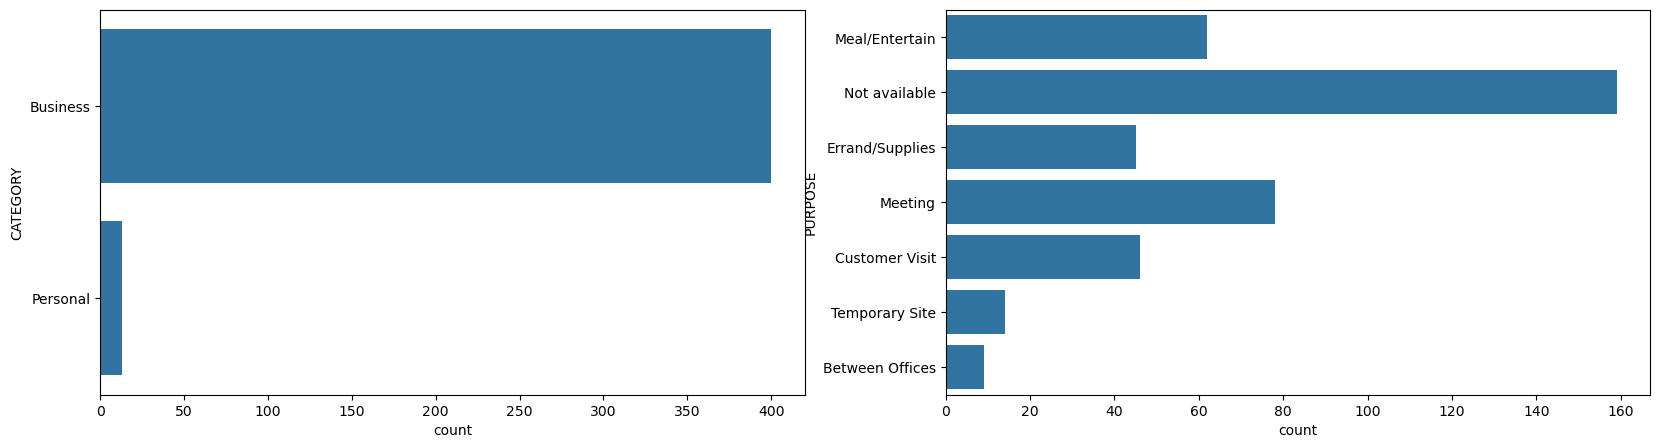

In [92]:
#1.In which category people do book uber the most?
#2.For what purpose people do book uber the most?

import seaborn as sns

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)

sns.countplot(data['CATEGORY'])

plt.subplot(1,2,2)
sns.countplot(data['PURPOSE'])


<Axes: xlabel='count', ylabel='DAYNIGHT'>

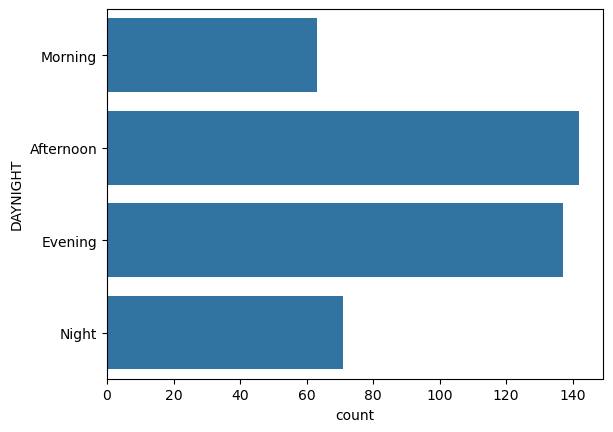

In [96]:
#3. At what time people book uber the most?

sns.countplot(data['DAYNIGHT'])

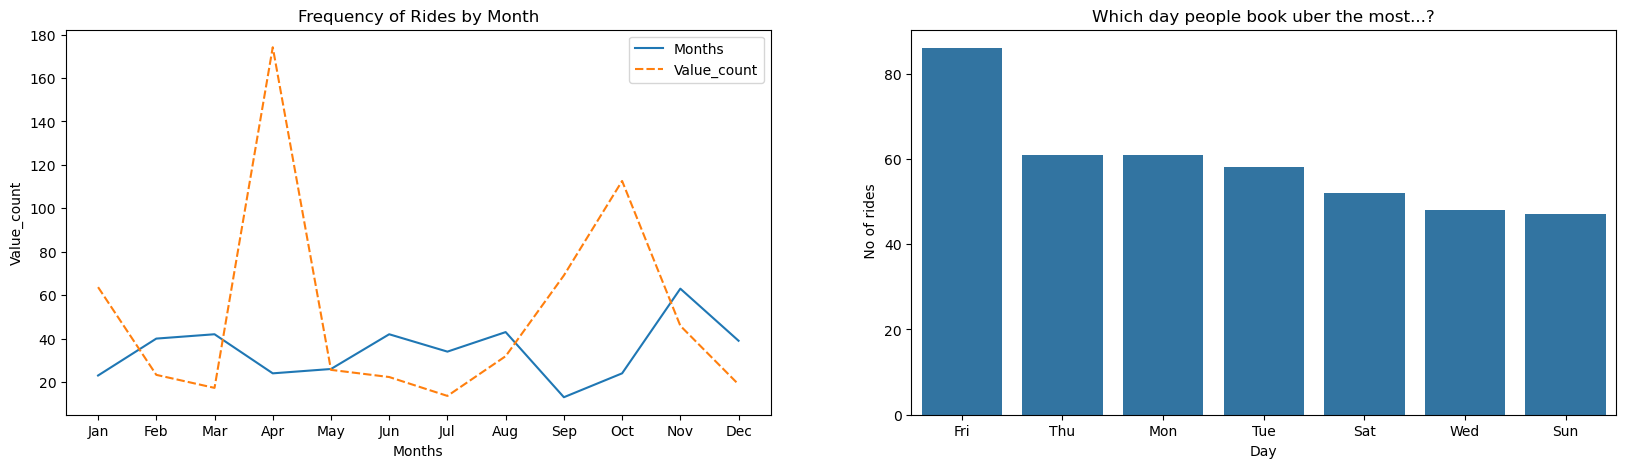

In [186]:
#4. In which months people book uber less frequently?
#5. In which days of week people book uber the most?

#for this we have to create two new columns month,day of week

data['MONTH']= pd.DatetimeIndex(data['START_DATE']).month

month_label= {1.0: 'Jan', 2.0: 'Feb', 3.0: 'Mar', 4.0 : 'Apr', 5.0:'May',6.0 :'Jun',
              7.0 : 'Jul', 8.0 : 'Aug', 9.0:'Sep', 10.0:'Oct', 11.0:'Nov',12.0: 'Dec'}

data['MONTH'] = data.MONTH.map(month_label)

mon = data.MONTH.value_counts(sort= False)

df= pd.DataFrame({
    'Months': mon.values,
    'Value_count' : data.groupby('MONTH', sort = False)['MILES'].max()
})

plt.figure(figsize=(20,5))

plt.subplot(1,2,1)

fig= sns.lineplot(data =df)
fig.set(xlabel='Months',ylabel='Value_count',title='Frequency of Rides by Month')

data['DAYOFWEEK']=pd.DatetimeIndex(data['START_DATE']).weekday

dayofweek_label = { 0 : 'Mon', 1 : 'Tue', 2 : 'Wed' , 3 : 'Thu', 4 : 'Fri', 5 : 'Sat', 6 : 'Sun'}

data['DAYOFWEEK'] = data.DAYOFWEEK.map(dayofweek_label)

daysofweek = data.DAYOFWEEK.value_counts(sort = True)

plt.subplot(1,2,2)
fig = sns.barplot(x= daysofweek.index, y=daysofweek)
fig.set(xlabel= "Day", ylabel=" No of rides", title="Which day people book uber the most...?")
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_4856\1549880914.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig= sns.distplot(data[data['MILES']<40]['MILES'])


[Text(0.5, 1.0, 'How many people usually book uber under 40 miles')]

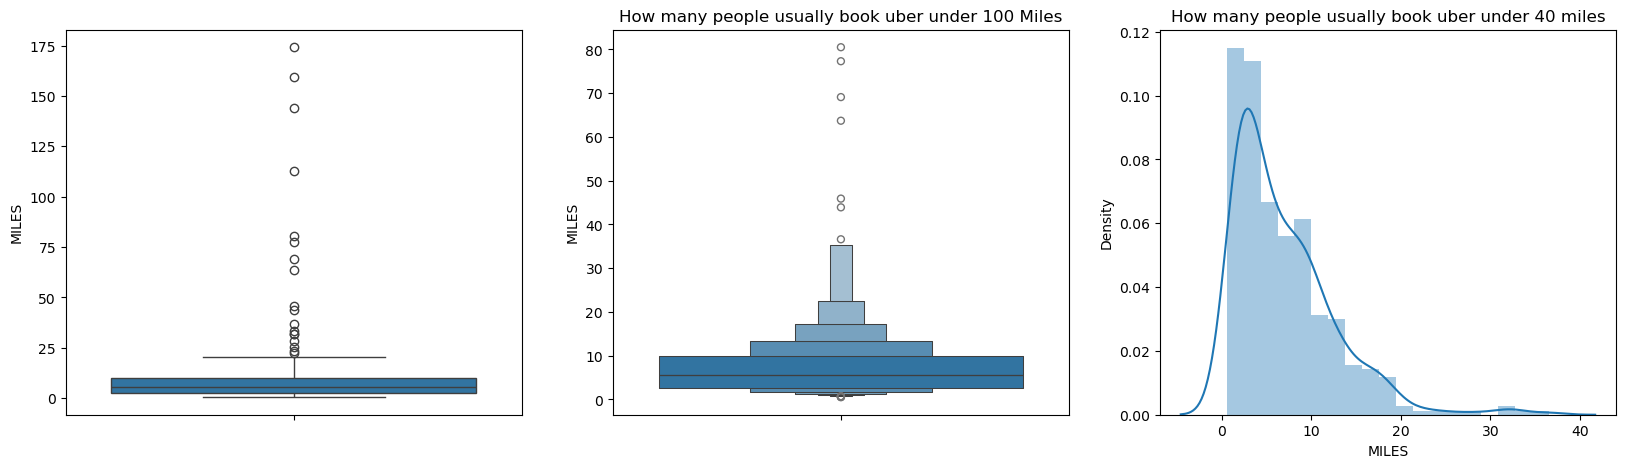

In [236]:
#6 How many miles do people usually book a cab throgh uber ?

plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
fig = sns.boxplot(data['MILES'])

plt.subplot(1,3,2)
fig=sns.boxenplot(data[data['MILES']<100]['MILES'])
fig.set(title='How many people usually book uber under 100 Miles')

plt.subplot(1,3,3)
fig= sns.distplot(data[data['MILES']<40]['MILES'])
fig.set(title= 'How many people usually book uber under 40 miles')